In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm.auto import tqdm

# illustrator font support for matplotlib
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [4]:
cd Scripts/

[Errno 2] No such file or directory: 'Scripts/'
/media/volume/sdb/ail/philanthrophysics/Disser/Scripts


In [5]:
dataName = "phst_240409_newest"
inputDataName = "phst_240409"



nullModelPath = Path("../NullModelResultsArticleLevel")
nullModelFiles = list(nullModelPath.glob("*.csv"))
resultsPath = Path("../Results")

nullModelIterations = 100
attractiveness = 0.05

inputPath = Path("../Data") 
inputTableFile = inputPath/f"WoS_2022_filtered_{inputDataName}.csv"
inputTableReferencesFile = inputPath/f"WoS_2022_filtered_references_{inputDataName}.csv"

inputDisruptionScoresFile = resultsPath/f"DisruptionIndex_{inputDataName}.csv"
nullModelName = f"MODEL_A{attractiveness}"

outputNoveltyArticleLevelTableZScoresFile = resultsPath/f"WoS_2022_ArticleLevel_Novelty_{dataName}_{nullModelName}_zscores.csv"
outputNoveltyArticleLevelTableZScoresWithCountsFile = resultsPath/f"WoS_2022_ArticleLevel_Novelty_{dataName}_{nullModelName}_zscores_withCounts.csv"




In [6]:
nullModelPath

PosixPath('../NullModelResultsArticleLevel')

In [7]:

dfPhilanthropy = pd.read_csv(inputTableFile,low_memory=False)

In [8]:
dfReferences = pd.read_csv(inputTableReferencesFile,low_memory=False)

# %%
dfReferences.sort_values(by=["PY"],inplace=True,ascending=True)

# %%
# Measure number of subject categories for each paper
referencePaperUIDs2SubjectCategories = {}
for referenceUID,subjectCategories,year in zip(tqdm(dfReferences["UT"]),dfReferences["WC"],dfReferences["PY"]):
    if(subjectCategories == subjectCategories):
        subjectCategories = subjectCategories.lower().split("; ")
        referencePaperUIDs2SubjectCategories[referenceUID] = subjectCategories

originalPaperUID2ReferencesSubjectCategories = {}
originalPaperUID2ReferencesSubjectCategoriesArrays = {}
originalPaperUID2ReferencesSubjectCategoriesArraysCount = {}

for philanthropyUID,referencesList in zip(tqdm(dfPhilanthropy["UT"]),dfPhilanthropy["CI"]):
    if referencesList==referencesList:
        for referenceUID in referencesList.split("; "):
            if referenceUID and referenceUID and referenceUID in referencePaperUIDs2SubjectCategories:
                if philanthropyUID not in originalPaperUID2ReferencesSubjectCategories:
                    originalPaperUID2ReferencesSubjectCategories[philanthropyUID] = set()
                    originalPaperUID2ReferencesSubjectCategoriesArrays[philanthropyUID] = []
                originalPaperUID2ReferencesSubjectCategories[philanthropyUID].update(referencePaperUIDs2SubjectCategories[referenceUID])
                originalPaperUID2ReferencesSubjectCategoriesArrays[philanthropyUID].extend(referencePaperUIDs2SubjectCategories[referenceUID])
                originalPaperUID2ReferencesSubjectCategoriesArraysCount[philanthropyUID] = len(originalPaperUID2ReferencesSubjectCategoriesArrays[philanthropyUID])

# Create a column to store number of subject categories
dfPhilanthropy["ReferenceSubjectCategories"] = dfPhilanthropy["UT"].map(originalPaperUID2ReferencesSubjectCategoriesArraysCount)


  0%|          | 0/513406 [00:00<?, ?it/s]

  0%|          | 0/60685 [00:00<?, ?it/s]

In [9]:
inputNoveltyArticleLevelTableFile = resultsPath/f"WoS_2022_ArticleLevel_Novelty_{dataName}.csv"
# inputNullModelNoveltyFieldLevelTableFile = resultsPath/f"WoS_2022_FieldLevel_Novelty_{dataName}.csv"
# inputNoveltySubjectCategoriesTableFile = inputPath/f"WoS_2022_SubjectCategories_Novelty_{dataName}.csv"
dfReal = pd.read_csv(inputNoveltyArticleLevelTableFile)


/tmp/ipykernel_2223121/886291421.py:4: DtypeWarning: Columns (2,27,32) have mixed types. Specify dtype option on import or set low_memory=False.
  dfReal = pd.read_csv(inputNoveltyArticleLevelTableFile)


In [10]:
nullModelData = []
for realization in range(1,nullModelIterations):
    inputNullModelName = f"MODEL_A{attractiveness}_R{realization}"

    inputNullModelNoveltyArticleLevelTableFile = nullModelPath/f"WoS_2022_ArticleLevel_Novelty_{dataName}_{inputNullModelName}.csv"
    # inputNullModelNoveltyFieldLevelTableFile = nullModelPath/f"WoS_2022_FieldLevel_Novelty_{dataName}_{inputNullModelName}.csv"
    # inputNullModelNoveltySubjectCategoriesTableFile = nullModelPath/f"WoS_2022_SubjectCategories_Novelty_{dataName}_{inputNullModelName}.csv"
    # skip if file does not exist
    try:
        df = pd.read_csv(inputNullModelNoveltyArticleLevelTableFile)
        df["Realization"] = realization
        nullModelData.append(df)
    except:
        print(f"File {inputNullModelNoveltyArticleLevelTableFile} not found")
        continue

realizationCount = len(nullModelData)
nullModelData = pd.concat(nullModelData)



/tmp/ipykernel_2223121/4071532356.py:10: DtypeWarning: Columns (2,27,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(inputNullModelNoveltyArticleLevelTableFile)
/tmp/ipykernel_2223121/4071532356.py:10: DtypeWarning: Columns (2,27,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(inputNullModelNoveltyArticleLevelTableFile)
/tmp/ipykernel_2223121/4071532356.py:10: DtypeWarning: Columns (2,27,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(inputNullModelNoveltyArticleLevelTableFile)
/tmp/ipykernel_2223121/4071532356.py:10: DtypeWarning: Columns (2,27,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(inputNullModelNoveltyArticleLevelTableFile)
/tmp/ipykernel_2223121/4071532356.py:10: DtypeWarning: Columns (2,27,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.rea

File ../NullModelResultsArticleLevel/WoS_2022_ArticleLevel_Novelty_phst_240409_newest_MODEL_A0.05_R90.csv not found
File ../NullModelResultsArticleLevel/WoS_2022_ArticleLevel_Novelty_phst_240409_newest_MODEL_A0.05_R91.csv not found
File ../NullModelResultsArticleLevel/WoS_2022_ArticleLevel_Novelty_phst_240409_newest_MODEL_A0.05_R92.csv not found
File ../NullModelResultsArticleLevel/WoS_2022_ArticleLevel_Novelty_phst_240409_newest_MODEL_A0.05_R93.csv not found
File ../NullModelResultsArticleLevel/WoS_2022_ArticleLevel_Novelty_phst_240409_newest_MODEL_A0.05_R94.csv not found
File ../NullModelResultsArticleLevel/WoS_2022_ArticleLevel_Novelty_phst_240409_newest_MODEL_A0.05_R95.csv not found
File ../NullModelResultsArticleLevel/WoS_2022_ArticleLevel_Novelty_phst_240409_newest_MODEL_A0.05_R96.csv not found
File ../NullModelResultsArticleLevel/WoS_2022_ArticleLevel_Novelty_phst_240409_newest_MODEL_A0.05_R97.csv not found
File ../NullModelResultsArticleLevel/WoS_2022_ArticleLevel_Novelty_phst_

In [11]:
nullModelData["ReferenceSubjectCategories"] = nullModelData["UT"].map(originalPaperUID2ReferencesSubjectCategoriesArraysCount)


In [12]:
nullModelGroups = nullModelData.groupby("UT")

In [13]:
allNullModels = list(nullModelGroups)

In [14]:
yearSubjectCategoriesCounts2UTs = {}
# create tuples of ReferenceSubjectCategories and PY
for philanthropyUID,year,subjectCategoriesCount in zip(dfPhilanthropy["UT"],dfPhilanthropy["PY"],dfPhilanthropy["ReferenceSubjectCategories"]):
    # ignore subjectCategoriesCount nans
    if subjectCategoriesCount == subjectCategoriesCount:
        pair = (year,int(subjectCategoriesCount))
        if pair not in yearSubjectCategoriesCounts2UTs:
            yearSubjectCategoriesCounts2UTs[pair] = []
        yearSubjectCategoriesCounts2UTs[pair].append(philanthropyUID)


In [15]:
# Average references by journal
#  each entry is separated by ; remove empty entries ; 
dfPhilanthropy["JournalAverageReferenceCount"] = dfPhilanthropy["CI"].str.split("; ").apply(lambda x: len([i for i in x if i != ""]) if x==x else x)
# also just the reference count of papers
dfPhilanthropy["ReferenceCount"] = dfPhilanthropy["CI"].str.split("; ").apply(lambda x: len([i for i in x if i != ""]) if x==x else x)

Text(0.5, 1.0, 'Histogram of references count')

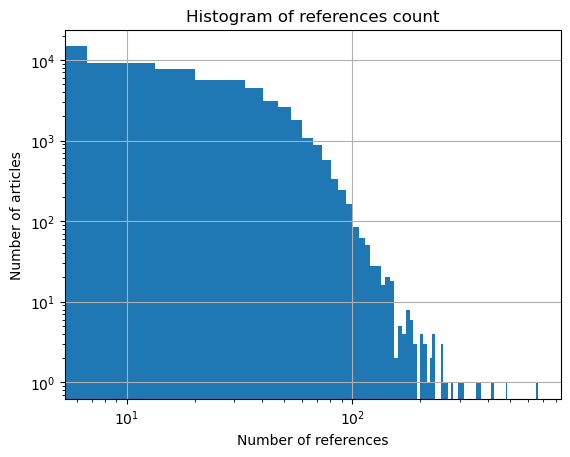

In [16]:
# histogram of references count ignoring nan log on both axes
bins = np.logspace(0, np.log10(dfPhilanthropy["JournalAverageReferenceCount"].max()), 50)
dfPhilanthropy["JournalAverageReferenceCount"].hist(bins=100 , log=True)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of references")
plt.ylabel("Number of articles")
plt.title("Histogram of references count")

<Axes: xlabel='JI'>

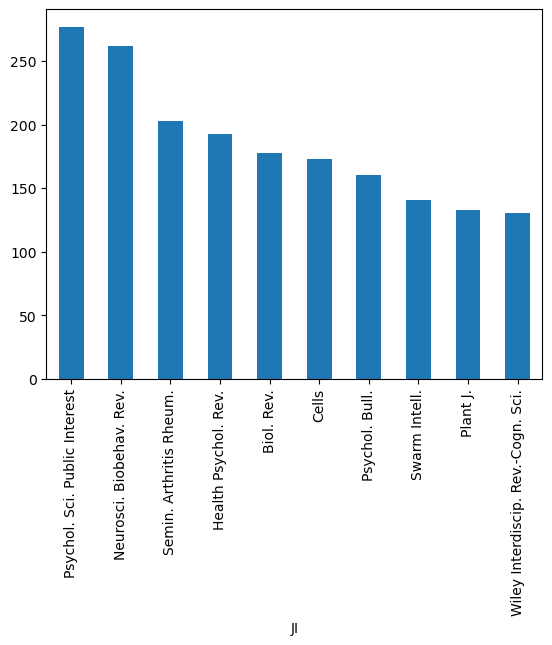

In [17]:


dfPhilanthropy.groupby("JI")["JournalAverageReferenceCount"].mean().sort_values(ascending=False).head(10).plot(kind="bar")

  0%|          | 0/60684 [00:00<?, ?it/s]

/mnt/helios/miniconda3/envs/adnet/lib/python3.10/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Text(0.5, 0, 'StrengthenerNoveltyImpactAverage Score')

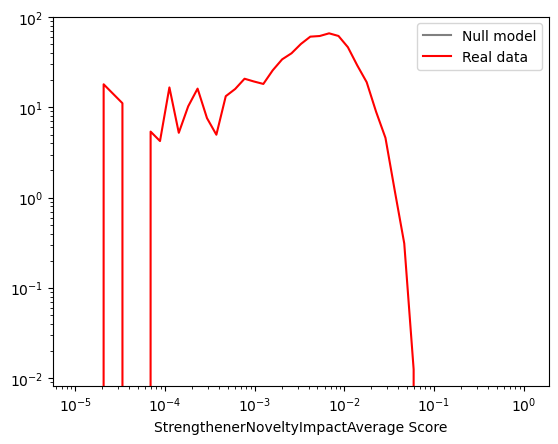

In [18]:
measureName = "StrengthenerNoveltyImpactAverage"
maxValue = max(dfReal[measureName].max(), nullModelData[measureName].max())
bins = np.logspace(-5, maxValue, 50)
avgDistributions = np.zeros(len(bins)-1)
for groupName, groupData in tqdm(allNullModels):
    hist, _ = np.histogram(groupData[measureName], bins=bins,density=True)
    avgDistributions += hist

avgDistributions /= len(allNullModels)
plt.plot(bins[:-1], avgDistributions, label="Null model", color="gray")
histogram,_ = np.histogram(dfReal[measureName], bins=bins,density=True)
plt.plot(bins[:-1], histogram, label="Real data", color="red")

plt.legend()
# plot std in another axis
plt.yscale("log")
plt.xscale("log")
plt.xlabel(f"{measureName} Score")

# Check how similar are the agregated distributions
# Check h

In [19]:
features = ['PioneerNoveltyScore',
       'PioneerNoveltyImpact_W5',
       'PioneerNoveltyImpact_W10',
       'ShortenerNoveltyScoreAvg', 'ShortenerNoveltyScoreMedian',
       'ShortenerNoveltyScoreMax', 'ShortenerNoveltyEnhancedAverage',
       'ShortenerNoveltyDiminishAverage', 'ShortenerNoveltyEnhancedMin',
       'ShortenerNoveltyDiminishMin', 'ShortenerNoveltyEnhancedMax',
       'ShortenerNoveltyDiminishMax', 'ShortenerNoveltyEnhancedMedian',
       'ShortenerNoveltyDiminishMedian',
       'StrengthenerNoveltyRank', 'StrengthenerNoveltyImpactAverage',
       'StrengthenerNoveltyImpactMedian', 'StrengthenerNoveltyImpactMax',
       'StrengthenerNoveltyImpactMin']

In [20]:
yearSubjectCategoriesCounts2Means = {}
yearSubjectCategoriesCounts2Std = {}

for yearSubjectCategoriesCount,UTs in tqdm(yearSubjectCategoriesCounts2UTs.items()):
    UTs = set(UTs)
    UTsData = nullModelData[nullModelData["UT"].isin(UTs)]
    for feature in features:
        if feature not in yearSubjectCategoriesCounts2Means:
            yearSubjectCategoriesCounts2Means[feature] = {}
            yearSubjectCategoriesCounts2Std[feature] = {}
        mean = UTsData[feature].mean()
        std = UTsData[feature].std()
        yearSubjectCategoriesCounts2Means[feature][yearSubjectCategoriesCount] = mean
        yearSubjectCategoriesCounts2Std[feature][yearSubjectCategoriesCount] = std

  0%|          | 0/4535 [00:00<?, ?it/s]

In [21]:
scCountsFeatures = []
scCountsYear = []
scCounts = []
scCountsMean = []
scCountsSTD = []

for feature in yearSubjectCategoriesCounts2Means.keys():
    for year,count in yearSubjectCategoriesCounts2Means[feature].keys():
        scCountsFeatures.append(feature)
        scCountsYear.append(year)
        scCounts.append(count)
        scCountsMean.append(yearSubjectCategoriesCounts2Means[feature][(year,count)])
        scCountsSTD.append(yearSubjectCategoriesCounts2Std[feature][(year,count)])

dfSCCounts = pd.DataFrame({"Feature":scCountsFeatures,"Year":scCountsYear,"Count":scCounts,"Mean":scCountsMean,"STD":scCountsSTD})

In [22]:
dfSCCounts["Feature"].unique()

array(['PioneerNoveltyScore', 'PioneerNoveltyImpact_W5',
       'PioneerNoveltyImpact_W10', 'ShortenerNoveltyScoreAvg',
       'ShortenerNoveltyScoreMedian', 'ShortenerNoveltyScoreMax',
       'ShortenerNoveltyEnhancedAverage',
       'ShortenerNoveltyDiminishAverage', 'ShortenerNoveltyEnhancedMin',
       'ShortenerNoveltyDiminishMin', 'ShortenerNoveltyEnhancedMax',
       'ShortenerNoveltyDiminishMax', 'ShortenerNoveltyEnhancedMedian',
       'ShortenerNoveltyDiminishMedian', 'StrengthenerNoveltyRank',
       'StrengthenerNoveltyImpactAverage',
       'StrengthenerNoveltyImpactMedian', 'StrengthenerNoveltyImpactMax',
       'StrengthenerNoveltyImpactMin'], dtype=object)

Text(0, 0.5, 'Mean ShortenerNoveltyScoreAvg')

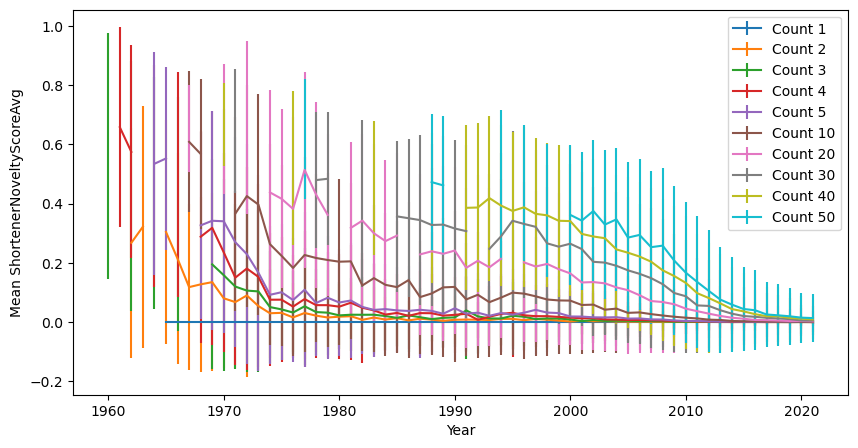

In [23]:
featureName = "ShortenerNoveltyScoreAvg"
# plot mean over time for different subject categories counts like 1,2,3,4,5,10,20,30,40,50 (when available)
plt.figure(figsize=(10,5))

yearsRange = range(1960,2022)
for count in [1,2,3,4,5,10,20,30,40,50]:
    df = dfSCCounts[(dfSCCounts["Count"]==count) & (dfSCCounts["Feature"]==featureName)]
    if(len(df)>0):
        # use yearsRange
        dfYear = df.set_index("Year").reindex(yearsRange).reset_index()
        plt.errorbar(dfYear["Year"],dfYear["Mean"],yerr=dfYear["STD"],label=f"Count {count}")

        
plt.legend()
plt.xlabel("Year")
plt.ylabel(f"Mean {featureName}")



In [24]:
nullModelData.keys()

Index(['PT', 'AU', 'BE', 'AF', 'TI', 'SO', 'SE', 'LA', 'DT', 'CT', 'CY', 'CL',
       'SP', 'HO', 'DE', 'ID', 'C1', 'RP', 'EM', 'FU', 'FX', 'CI', 'PU', 'PI',
       'PA', 'SN', 'EI', 'BN', 'J9', 'JI', 'PD', 'PY', 'VL', 'IS', 'PN', 'SU',
       'SI', 'BP', 'EP', 'AR', 'DI', 'EA', 'EB', 'PG', 'WC', 'WE', 'SC', 'PM',
       'OA', 'UT', 'PioneerNoveltyScore', 'IntroducedSubjectCategories',
       'PioneerNoveltyImpact_W5', 'PioneerNoveltyImpactScores_W5',
       'PioneerNoveltyImpact_W10', 'PioneerNoveltyImpactScores_W10',
       'ShortenerNoveltyScoreAvg', 'ShortenerNoveltyScoreMedian',
       'ShortenerNoveltyScoreMax', 'ShortenerNoveltyEnhancedAverage',
       'ShortenerNoveltyDiminishAverage', 'ShortenerNoveltyImpactAverage',
       'ShortenerNoveltyEnhancedMin', 'ShortenerNoveltyDiminishMin',
       'ShortenerNoveltyImpactMin', 'ShortenerNoveltyEnhancedMax',
       'ShortenerNoveltyDiminishMax', 'ShortenerNoveltyImpactMax',
       'ShortenerNoveltyEnhancedMedian', 'ShortenerNoveltyDim

In [25]:
# create avarage "PioneerNoveltyScore" across realizations in nullModelData
# should groupby "UT" but only do that for "PioneerNoveltyScore"
features = ['PioneerNoveltyScore',
       'PioneerNoveltyImpact_W5',
       'PioneerNoveltyImpact_W10',
       'ShortenerNoveltyScoreAvg',
       'ShortenerNoveltyScoreMedian',
       'ShortenerNoveltyScoreMax',
       'ShortenerNoveltyEnhancedAverage',
       'ShortenerNoveltyDiminishAverage',
       'ShortenerNoveltyEnhancedMin',
       'ShortenerNoveltyDiminishMin',
       'ShortenerNoveltyEnhancedMax',
       'ShortenerNoveltyDiminishMax',
       'ShortenerNoveltyEnhancedMedian',
       'ShortenerNoveltyDiminishMedian',
    #    'ShortenerNoveltyFitEnhancedAverage',
    #    'ShortenerNoveltyFitDiminishAverage',
    #    'ShortenerNoveltyFitEnhancedMin',
    #    'ShortenerNoveltyFitDiminishMin',
    #    'ShortenerNoveltyFitEnhancedMax',
    #    'ShortenerNoveltyFitDiminishMax',
    #    'ShortenerNoveltyFitEnhancedMedian',
    #    'ShortenerNoveltyFitDiminishMedian',
       'StrengthenerNoveltyRank',
       'StrengthenerNoveltyImpactAverage',
       'StrengthenerNoveltyImpactMedian',
       'StrengthenerNoveltyImpactMax',
       'StrengthenerNoveltyImpactMin']

dataNovelty = dfReal[["UT"]+features].copy()
nullModelData = nullModelData.copy()
# set all features nan to zero for all the data
nullModelData[features] = nullModelData[features].fillna(0)
dataNovelty[features] = dataNovelty[features].fillna(0)

def fixStrengthenerRank(df):
    strengthenerRanks = df["StrengthenerNoveltyRank"].copy()
    maxValue = max(strengthenerRanks)
    strengthenerRanks.replace(0, maxValue+1, inplace=True)
    return maxValue-strengthenerRanks+1

dataNovelty["StrengthenerNoveltyRank"] = fixStrengthenerRank(dataNovelty)
nullModelData["StrengthenerNoveltyRank"] = fixStrengthenerRank(nullModelData)

featuresDictionaryMean = {feature: "mean" for feature in features}
featuresDictionaryMean["PY"] = "first"
featuresDictionaryMean["ReferenceSubjectCategories"] = "first"
featuresDictionaryStd = {feature: "std" for feature in features}
featuresDictionaryStd["PY"] = "first"
featuresDictionaryStd["ReferenceSubjectCategories"] = "first"
nullModelNoveltyMean = nullModelData.groupby("UT").agg(featuresDictionaryMean).reset_index()
nullModelNoveltyStd = nullModelData.groupby("UT").agg(featuresDictionaryStd).reset_index()



# imputation
# for each feature replace nan or zeros in the std with the mean of the std by year (PY)
# features except StrengthenerNoveltyRank
featuresImputation = features.copy()

# for all the entries with zero std, replace with (1/realizationCount)
# for feature in featuresImputation:
#     nullModelNoveltyStd[feature] = nullModelNoveltyStd[feature].replace(0, 1/realizationCount)
# featuresImputation.remove("StrengthenerNoveltyRank")
# Pooled variance imputation (by year)

for feature in tqdm(features, desc="Features"):
    if feature in yearSubjectCategoriesCounts2Std:
        for year,referenceCount in tqdm(yearSubjectCategoriesCounts2Std[feature].keys(),leave=False, desc="Counts Year Pairs"):
            # replace by the values from yearSubjectCategoriesCounts2Std
            meanStd = yearSubjectCategoriesCounts2Std[feature][(year,referenceCount)]
            mask = (nullModelNoveltyStd["PY"] == year) & (nullModelNoveltyStd["ReferenceSubjectCategories"] == referenceCount)
            nullModelNoveltyStd.loc[mask, feature] = meanStd

for feature in tqdm(features, desc="Features"):
    if feature in yearSubjectCategoriesCounts2Means:
        for year,referenceCount in tqdm(yearSubjectCategoriesCounts2Means[feature].keys(),leave=False, desc="Counts Year Pairs"):
            # replace by the values from yearSubjectCategoriesCounts2Means
            meanMean = yearSubjectCategoriesCounts2Means[feature][(year,referenceCount)]
            mask = (nullModelNoveltyMean["PY"] == year) & (nullModelNoveltyMean["ReferenceSubjectCategories"] == referenceCount)
            nullModelNoveltyMean.loc[mask, feature] = meanMean

# Imputation if needed:
for feature in features:
    for year in nullModelNoveltyStd["PY"].unique():
        meanStd = nullModelNoveltyStd[nullModelNoveltyStd["PY"] == year][feature].mean()
        # if meanStd == 0:
        #     meanStd = nullModelNoveltyStd[feature].mean()
        nullModelNoveltyStd.loc[nullModelNoveltyStd["PY"] == year, feature] = nullModelNoveltyStd.loc[nullModelNoveltyStd["PY"] == year, feature].replace(0, meanStd).fillna(meanStd)

# also do imputation for the mean only for nan values
for feature in features:
    for year in nullModelNoveltyMean["PY"].unique():
        meanMean = nullModelNoveltyMean[nullModelNoveltyMean["PY"] == year][feature].mean()
        nullModelNoveltyMean.loc[nullModelNoveltyMean["PY"] == year, feature] = nullModelNoveltyMean.loc[nullModelNoveltyMean["PY"] == year, feature].fillna(meanMean)

# remove PY column
nullModelNoveltyMean = nullModelNoveltyMean.drop(columns=["PY"])
nullModelNoveltyStd = nullModelNoveltyStd.drop(columns=["PY"])
nullModelNoveltyMean = nullModelNoveltyMean.drop(columns=["ReferenceSubjectCategories"])
nullModelNoveltyStd = nullModelNoveltyStd.drop(columns=["ReferenceSubjectCategories"])

# add suffixes to the columns except UT column
# _Real for dataPieoneerNovelty
# _NullMean for nullModelPioneerNoveltyMean
# _NullStd for nullModelPioneerNoveltyStd
dataNovelty = dataNovelty.add_suffix('_Real')
nullModelNoveltyMean = nullModelNoveltyMean.add_suffix('_NullMean')
nullModelNoveltyStd = nullModelNoveltyStd.add_suffix('_NullStd')
# remove suffix from UT column
dataNovelty.rename(columns = {'UT_Real':'UT'}, inplace = True)
nullModelNoveltyMean.rename(columns = {'UT_NullMean':'UT'}, inplace = True)
nullModelNoveltyStd.rename(columns = {'UT_NullStd':'UT'}, inplace = True)

# merge dataPieoneerNovelty, nullModelPioneerNoveltyMean, nullModelPioneerNoveltyStd
dataNovelty = pd.merge(dataNovelty, nullModelNoveltyMean, on="UT")
dataNovelty = pd.merge(dataNovelty, nullModelNoveltyStd, on="UT")

# now calculate zScore version
for feature in features:
    dataNovelty[f"{feature}_zScore"] = (dataNovelty[f"{feature}_Real"] - dataNovelty[f"{feature}_NullMean"])/dataNovelty[f"{feature}_NullStd"]

dataNovelty.to_csv(outputNoveltyArticleLevelTableZScoresFile, index=False)
# merge dataNovelty with dfPhilanthropy via UT
dfMerged = pd.merge(dataNovelty, dfPhilanthropy, on="UT")
dataNoveltyWithCounts = pd.merge(dataNovelty, dfPhilanthropy[["UT", "ReferenceCount","JournalAverageReferenceCount"]], on="UT")
# save
dataNoveltyWithCounts.to_csv(outputNoveltyArticleLevelTableZScoresWithCountsFile, index=False)



Features:   0%|          | 0/19 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Features:   0%|          | 0/19 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

Counts Year Pairs:   0%|          | 0/4535 [00:00<?, ?it/s]

In [26]:
# save outputNoveltyArticleLevelTableZScoresFile
# PioneerNoveltyImpact_W5_zScore
# PioneerNoveltyImpact_W5_nullMean
# PioneerNoveltyImpact_W5_nullStd
outputNoveltyArticleLevelTableZScoresWithCountsFile

PosixPath('../Results/WoS_2022_ArticleLevel_Novelty_phst_240409_newest_MODEL_A0.05_zscores_withCounts.csv')

In [27]:
list(dataNovelty.keys())

['UT',
 'PioneerNoveltyScore_Real',
 'PioneerNoveltyImpact_W5_Real',
 'PioneerNoveltyImpact_W10_Real',
 'ShortenerNoveltyScoreAvg_Real',
 'ShortenerNoveltyScoreMedian_Real',
 'ShortenerNoveltyScoreMax_Real',
 'ShortenerNoveltyEnhancedAverage_Real',
 'ShortenerNoveltyDiminishAverage_Real',
 'ShortenerNoveltyEnhancedMin_Real',
 'ShortenerNoveltyDiminishMin_Real',
 'ShortenerNoveltyEnhancedMax_Real',
 'ShortenerNoveltyDiminishMax_Real',
 'ShortenerNoveltyEnhancedMedian_Real',
 'ShortenerNoveltyDiminishMedian_Real',
 'StrengthenerNoveltyRank_Real',
 'StrengthenerNoveltyImpactAverage_Real',
 'StrengthenerNoveltyImpactMedian_Real',
 'StrengthenerNoveltyImpactMax_Real',
 'StrengthenerNoveltyImpactMin_Real',
 'PioneerNoveltyScore_NullMean',
 'PioneerNoveltyImpact_W5_NullMean',
 'PioneerNoveltyImpact_W10_NullMean',
 'ShortenerNoveltyScoreAvg_NullMean',
 'ShortenerNoveltyScoreMedian_NullMean',
 'ShortenerNoveltyScoreMax_NullMean',
 'ShortenerNoveltyEnhancedAverage_NullMean',
 'ShortenerNoveltyDi

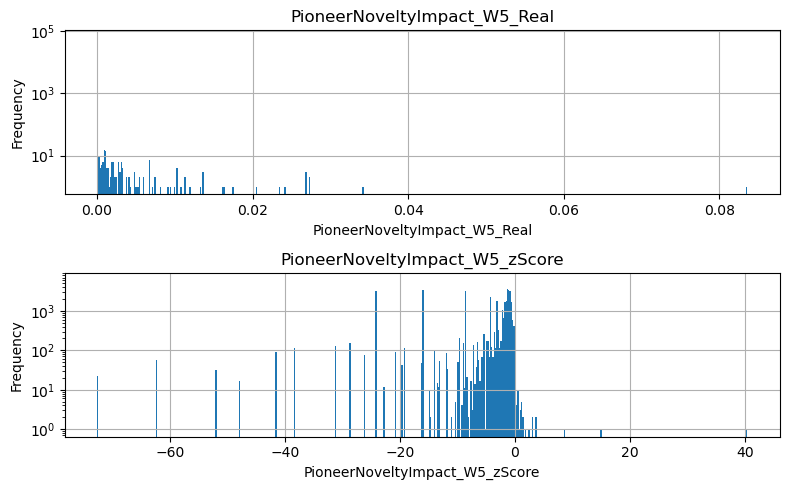

In [28]:

dataName = "PioneerNoveltyImpact_W5"
# show distribution of zScore
fig, axes = plt.subplots(2, 1, figsize=(8, 5))
# only for non-null values and finite values
for index, suffix in enumerate(["_Real", "_zScore"]):
    propertyName = f"{dataName}{suffix}"
    validValues = dataNovelty[propertyName][np.isfinite(dataNovelty[propertyName])]
    validValues.hist(bins=500, ax=axes[index])
    axes[index].set_yscale('log')
    axes[index].set_title(propertyName)
    axes[index].set_xlabel(propertyName)
    axes[index].set_ylabel("Frequency")
plt.tight_layout()
plt.show()


In [29]:
# compare to disruption
dfDisruption = pd.read_csv(inputDisruptionScoresFile)
# rename PublicationId to UT
dfDisruption.rename(columns = {'PublicationId':'UT'}, inplace = True)
dataNovelty = pd.merge(dataNovelty, dfDisruption, on="UT")


In [30]:
list(dataNovelty.keys())

['UT',
 'PioneerNoveltyScore_Real',
 'PioneerNoveltyImpact_W5_Real',
 'PioneerNoveltyImpact_W10_Real',
 'ShortenerNoveltyScoreAvg_Real',
 'ShortenerNoveltyScoreMedian_Real',
 'ShortenerNoveltyScoreMax_Real',
 'ShortenerNoveltyEnhancedAverage_Real',
 'ShortenerNoveltyDiminishAverage_Real',
 'ShortenerNoveltyEnhancedMin_Real',
 'ShortenerNoveltyDiminishMin_Real',
 'ShortenerNoveltyEnhancedMax_Real',
 'ShortenerNoveltyDiminishMax_Real',
 'ShortenerNoveltyEnhancedMedian_Real',
 'ShortenerNoveltyDiminishMedian_Real',
 'StrengthenerNoveltyRank_Real',
 'StrengthenerNoveltyImpactAverage_Real',
 'StrengthenerNoveltyImpactMedian_Real',
 'StrengthenerNoveltyImpactMax_Real',
 'StrengthenerNoveltyImpactMin_Real',
 'PioneerNoveltyScore_NullMean',
 'PioneerNoveltyImpact_W5_NullMean',
 'PioneerNoveltyImpact_W10_NullMean',
 'ShortenerNoveltyScoreAvg_NullMean',
 'ShortenerNoveltyScoreMedian_NullMean',
 'ShortenerNoveltyScoreMax_NullMean',
 'ShortenerNoveltyEnhancedAverage_NullMean',
 'ShortenerNoveltyDi

In [35]:
dataNames = [
    "PioneerNoveltyScore",
    "PioneerNoveltyImpact_W5",
    # "PioneerNoveltyImpact_W10",
    "ShortenerNoveltyScoreAvg",
    "ShortenerNoveltyEnhancedAverage",
    "ShortenerNoveltyDiminishAverage",
    "StrengthenerNoveltyRank",
    "StrengthenerNoveltyImpactAverage",
]

tableOfValues = []
for dataName in dataNames:
    # plot correlation between dataName and DisruptionIndex
    fig, axesList = plt.subplots(2, 2, figsize=(8, 8))
    for suffixIndex, suffix in enumerate(["_Real", "_zScore"]):
        axes = axesList[suffixIndex]
        for index,onlyPositive in enumerate([False, True]):
            propertyName = f"{dataName}{suffix}"
            validPropertyValues = dataNovelty[propertyName][np.isfinite(dataNovelty[propertyName]) & np.isfinite(dataNovelty["DisruptionIndex"])]
            validDisruptionValues = dataNovelty["DisruptionIndex"][np.isfinite(dataNovelty[propertyName]) & np.isfinite(dataNovelty["DisruptionIndex"])]
            onlyNegative=False
            if onlyPositive:
                positiveMask = (validPropertyValues>0) & (validDisruptionValues>0)
                if(np.sum(positiveMask)==0):
                    onlyNegative = True
                    onlyPositive = False
                    negativeMask = (validPropertyValues<0) & (validDisruptionValues>0)
                    validPropertyValues = -validPropertyValues[negativeMask]
                    validDisruptionValues = validDisruptionValues[negativeMask]
                else:
                    validPropertyValues = validPropertyValues[positiveMask]
                    validDisruptionValues = validDisruptionValues[positiveMask]

            axes[index].scatter(validDisruptionValues, validPropertyValues,alpha=0.2, s=10)
            axes[index].set_title(f"{dataName}{suffix}")
            axes[index].set_xlabel("DisruptionIndex")
            axes[index].set_ylabel(propertyName)
            if(onlyPositive):
                axes[index].set_xscale('log')
                axes[index].set_yscale('log')
            if(onlyNegative):
                axes[index].set_xscale('log')
                axes[index].set_yscale('log')
            # add text if onlyPositive on top right (right aligned text)
            if onlyPositive:
                axes[index].text(0.98, 0.98, "Only Positive", horizontalalignment='right', verticalalignment='top', transform=axes[index].transAxes)
            if onlyNegative:
                axes[index].text(0.98, 0.98, "Only Negative", horizontalalignment='right', verticalalignment='top', transform=axes[index].transAxes)
            
            # calculate correlation
            correlation = np.corrcoef(validDisruptionValues, validPropertyValues)[0,1]
            axes[index].text(0.02, 0.9, f"Pearson corr.: {correlation:.2f}", transform=axes[index].transAxes)
            # Spearman
            spearmanCorrelation = validDisruptionValues.corr(validPropertyValues, method='spearman')
            axes[index].text(0.02, 0.85, f"Spearman corr.: {spearmanCorrelation:.2f}", transform=axes[index].transAxes)
            tableOfValues.append([dataName, suffix, onlyPositive,onlyNegative, correlation, spearmanCorrelation])

    plt.tight_layout()
    plt.savefig(f"../Figures/DisruptionIndex_Vs_{dataName}.pdf")
    plt.close()

dfCorrelationsTable = pd.DataFrame(tableOfValues, columns=["DataName", "Suffix", "OnlyPositive", "OnlyNegative", "PearsonCorrelation", "SpearmanCorrelation"])
dfCorrelationsTable.to_csv(resultsPath/f"DisruptionIndex_Vs_NoveltyCorrelations.csv", index=False)
display(dfCorrelationsTable)

# latex table
print(dfCorrelationsTable.style.format(precision=2).to_latex())
# export table to csv
dfCorrelationsTable.to_csv(resultsPath/f"DisruptionIndex_Vs_NoveltyCorrelations.csv", index=False) 


,DataName,Suffix,OnlyPositive,OnlyNegative,PearsonCorrelation,SpearmanCorrelation
0,PioneerNoveltyScore,_Real,False,False,0.003245,0.000414
1,PioneerNoveltyScore,_Real,True,False,-0.167679,-0.243910
2,PioneerNoveltyScore,_zScore,False,False,-0.002854,-0.171873
3,PioneerNoveltyScore,_zScore,True,False,-0.047947,-0.099768
4,PioneerNoveltyImpact_W5,_Real,False,False,0.008712,0.003218
5,PioneerNoveltyImpact_W5,_Real,True,False,-0.008301,-0.054831
6,PioneerNoveltyImpact_W5,_zScore,False,False,0.134209,0.165889
7,PioneerNoveltyImpact_W5,_zScore,True,False,0.651244,0.117698
8,ShortenerNoveltyScoreAvg,_Real,False,False,-0.007042,-0.016559
9,ShortenerNoveltyScoreAvg,_Real,True,False,0.108042,0.134418


\begin{tabular}{lllrrrr}
 & DataName & Suffix & OnlyPositive & OnlyNegative & PearsonCorrelation & SpearmanCorrelation \\
0 & PioneerNoveltyScore & _Real & False & False & 0.00 & 0.00 \\
1 & PioneerNoveltyScore & _Real & True & False & -0.17 & -0.24 \\
2 & PioneerNoveltyScore & _zScore & False & False & -0.00 & -0.17 \\
3 & PioneerNoveltyScore & _zScore & True & False & -0.05 & -0.10 \\
4 & PioneerNoveltyImpact_W5 & _Real & False & False & 0.01 & 0.00 \\
5 & PioneerNoveltyImpact_W5 & _Real & True & False & -0.01 & -0.05 \\
6 & PioneerNoveltyImpact_W5 & _zScore & False & False & 0.13 & 0.17 \\
7 & PioneerNoveltyImpact_W5 & _zScore & True & False & 0.65 & 0.12 \\
8 & ShortenerNoveltyScoreAvg & _Real & False & False & -0.01 & -0.02 \\
9 & ShortenerNoveltyScoreAvg & _Real & True & False & 0.11 & 0.13 \\
10 & ShortenerNoveltyScoreAvg & _zScore & False & False & 0.03 & 0.08 \\
11 & ShortenerNoveltyScoreAvg & _zScore & True & False & 0.07 & -0.03 \\
12 & ShortenerNoveltyEnhancedAverage & _Rea

In [32]:
print(dfCorrelationsTable.style.format(precision=2).to_latex())


\begin{tabular}{lllrrrr}
 & DataName & Suffix & OnlyPositive & OnlyNegative & PearsonCorrelation & SpearmanCorrelation \\
0 & PioneerNoveltyScore & _Real & False & False & 0.00 & 0.00 \\
1 & PioneerNoveltyScore & _Real & True & False & -0.17 & -0.24 \\
2 & PioneerNoveltyScore & _zScore & False & False & -0.00 & -0.17 \\
3 & PioneerNoveltyScore & _zScore & True & False & -0.05 & -0.10 \\
4 & PioneerNoveltyImpact_W5 & _Real & False & False & 0.01 & 0.00 \\
5 & PioneerNoveltyImpact_W5 & _Real & True & False & -0.01 & -0.05 \\
6 & PioneerNoveltyImpact_W5 & _zScore & False & False & 0.13 & 0.17 \\
7 & PioneerNoveltyImpact_W5 & _zScore & True & False & 0.65 & 0.12 \\
8 & ShortenerNoveltyScoreAvg & _Real & False & False & -0.01 & -0.02 \\
9 & ShortenerNoveltyScoreAvg & _Real & True & False & 0.11 & 0.13 \\
10 & ShortenerNoveltyScoreAvg & _zScore & False & False & 0.03 & 0.08 \\
11 & ShortenerNoveltyScoreAvg & _zScore & True & False & 0.07 & -0.03 \\
12 & ShortenerNoveltyEnhancedAverage & _Rea

In [33]:
dataName

'StrengthenerNoveltyImpactAverage'

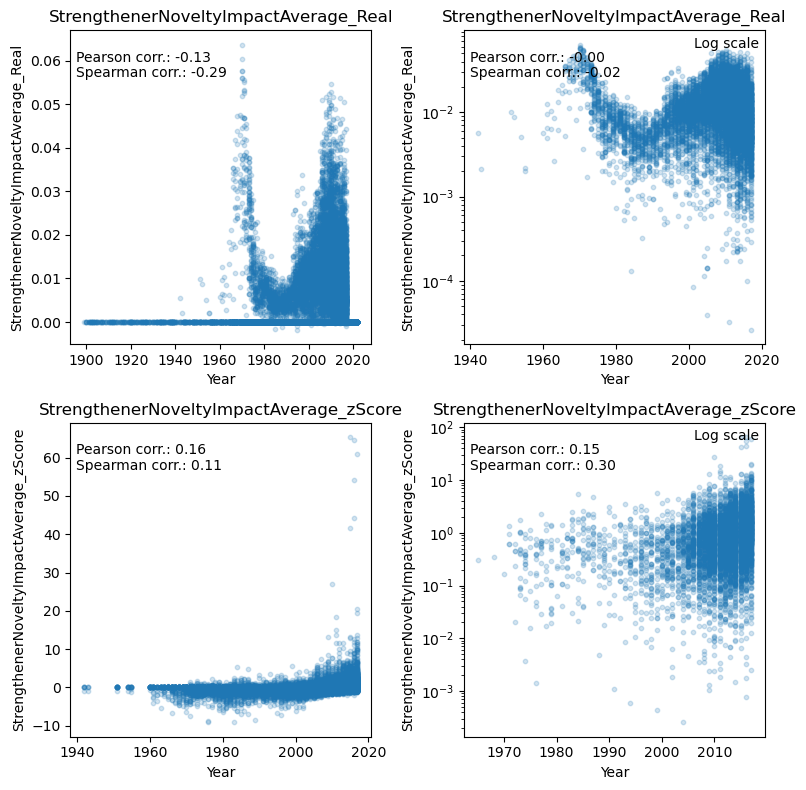

In [34]:

dataName = "StrengthenerNoveltyImpactAverage"
# scatter plots of novelty over time
fig, axesList = plt.subplots(2, 2, figsize=(8, 8))
for suffixIndex, suffix in enumerate(["_Real", "_zScore"]):
    axes = axesList[suffixIndex]
    for index,onlyPositive in enumerate([False, True]):
        propertyName = f"{dataName}{suffix}"
        validPropertyValues = dfMerged[propertyName][np.isfinite(dfMerged[propertyName]) & np.isfinite(dfMerged["PY"])]
        validDisruptionValues = dfMerged["PY"][np.isfinite(dfMerged[propertyName]) & np.isfinite(dfMerged["PY"])]
        if onlyPositive:
            positiveMask = (validPropertyValues>0) & (validDisruptionValues>0)
            validPropertyValues = validPropertyValues[positiveMask]
            validDisruptionValues = validDisruptionValues[positiveMask]
        axes[index].scatter(validDisruptionValues, validPropertyValues,alpha=0.2, s=10)
        axes[index].set_title(f"{dataName}{suffix}")
        axes[index].set_xlabel("Year")
        axes[index].set_ylabel(propertyName)
        if(onlyPositive):
            # axes[index].set_xscale('log')
            axes[index].set_yscale('log')
        
        # add text if onlyPositive on top right (right aligned text)
        if onlyPositive:
            axes[index].text(0.98, 0.98, "Log scale", horizontalalignment='right', verticalalignment='top', transform=axes[index].transAxes)
        # calculate correlation
        correlation = np.corrcoef(validDisruptionValues, validPropertyValues)[0,1]
        axes[index].text(0.02, 0.9, f"Pearson corr.: {correlation:.2f}", transform=axes[index].transAxes)
        # Spearman
        spearmanCorrelation = validDisruptionValues.corr(validPropertyValues, method='spearman')
        axes[index].text(0.02, 0.85, f"Spearman corr.: {spearmanCorrelation:.2f}", transform=axes[index].transAxes)
plt.tight_layout()
plt.show()